#### Problem Statement

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
#importing necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('trainset.csv') #reading train.csv file from local system
train.head(2) #checking the first two rows of the train set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Exploratory Data Analysis :-

In [4]:
#Checking for any duplicate values in the dataframe
dup = train[train.duplicated()]
dup

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Above we can see that there are no duplicate values in the dataframe.

In [8]:
train.shape

(614, 13)

In [12]:
#For dropping off the duplicate values

train.drop_duplicates(inplace = True)
train.shape

(614, 13)

The Dataset has 614 rows and 13 columns in it

In [14]:
#checking the columns and there datatype as well as if these have any null values in it or not.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see above the column names. 

Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History are the features which have some missing values

There are 4 columns with float64 datatype.

1 column which is **ApplicantIncome** has **int64** datatype.

8 columns have object datatype which are our categorical columns.

This dataset mostly consists of categorical columns as we can see above.

In [4]:
# Lets check the null records now

rows_with_NaN = train[train.isnull().any(axis=1)]
rows_with_NaN

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


**We see above that there are 134 rows with null values in it**

In [5]:
# Filling up of missing values in the dataset.
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [6]:
#Checking for number of null values in the dataset in each of the columns

train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train.drop(['Loan_ID'], inplace = True, axis =1) # Removing loan id from the dataset

In [8]:
#Lets group the entire dataset on the basis of gender to evaluate it

gender=  train.groupby(by = train['Gender']).mean()
gender

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5573.017928,1735.752829,150.861284,339.714868,0.844492


**We took the mean as there are less number of records of female as compared to male in the dataset which we have and we can clearly see that there is not much difference between males and females when comes to income, coapplicant income, loan amount, term and also credit history**

In [9]:
train.groupby(by = train['Married']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Married,,,,,
No,4970.384977,1316.558685,128.883495,351.115385,0.839196
Yes,5629.173367,1794.632965,155.750000,336.987147,0.842541


**We can see above that the LOANAMOUNT taken by Married people are more in proportion to the ones who are unmarried and can also see the mean data of both of different variables**

<AxesSubplot:xlabel='Gender', ylabel='count'>

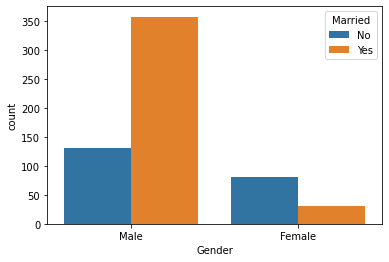

In [12]:
import seaborn as sns

sns.countplot(x= train['Gender'] , hue = train['Married'])

**Above chart is showing that mostly married males and unmarried females have taken loan**

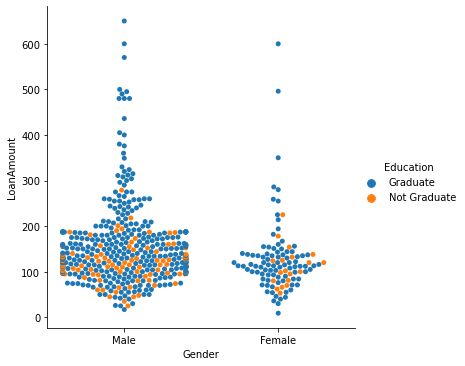

In [17]:
sns.catplot(x = "Gender", y = "LoanAmount", hue="Education", kind='swarm', data = train)

**Males and Females who are graduates are the ones who have mostly taken loan**

**Mostly are within the range of 100-200 for both females as well as males**

**There are very few not graduates who have taken loan and the loanamount taken by them is below 250k approx**

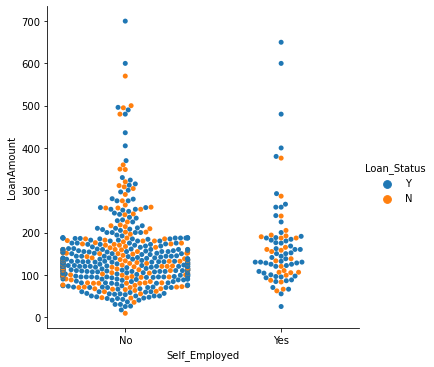

In [14]:
sns.catplot(x = "Self_Employed", y = "LoanAmount", hue="Loan_Status", kind='swarm', data = train)

**Mostly not self employed people have taken loan and loan status proportion are mostly equal**

**Few self employed have taken loan**

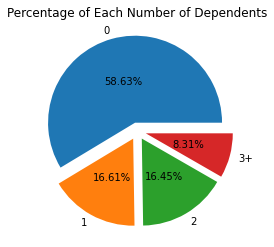

In [12]:
data = train['Dependents'].value_counts()
labels = data.keys()
plt.pie(x=data, labels = labels, autopct='%.2f%%',explode = [0.1]*4 ,pctdistance=0.50)
plt.title("Percentage of Each Number of Dependents")
plt.show()

**As we see in the above Pie Chart 59% people have no dependents at all and only 8% of the people have either 3 or more dependents**

Text(0.5, 1.0, 'Comparison between Laon Amount, Area and Status')

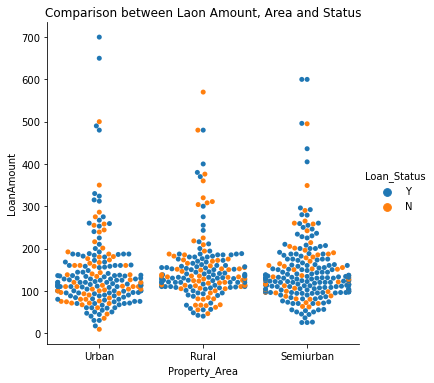

In [24]:
sns.catplot(x = "Property_Area", y = "LoanAmount", hue="Loan_Status", kind='swarm', data = train)
plt.title("Comparison between Laon Amount, Area and Status")

**Number of people from Semiurban areas are more who have applied for loans and most of them have paid back the amount**

**Highest Loan amount are taken by the people from urban areas and have been paid back by them**

**People who have failed to payback are mostly from Rural areas**

Text(0.5, 1.0, 'Comparison between Applicant Income, Credit History and Status')

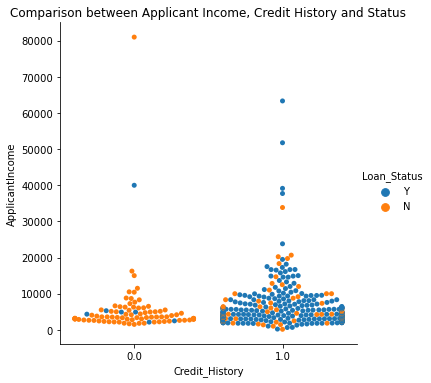

In [26]:
sns.catplot(x = "Credit_History", y = "ApplicantIncome", hue="Loan_Status", kind='swarm', data = train)
plt.title("Comparison between Applicant Income, Credit History and Status")

**People who do not have any credit history have mostly failed to payback whereas there income level is between 0- 20000 mostly and only 1 or 2 with 40000 and 80000 income, only few have paid it**

**Those who have credit history paid back there loans amd there level are within 40000 mostly**

**This plot depicts us that credit history is a very important variable for us**

Text(0.5, 1.0, 'Comparison between Loan_Amount_Term, LoanAmount and Status')

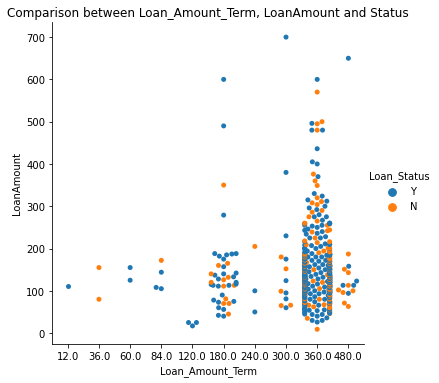

In [28]:
sns.catplot(x = "Loan_Amount_Term", y = "LoanAmount", hue="Loan_Status", kind='swarm', data = train)
plt.title("Comparison between Loan_Amount_Term, LoanAmount and Status")

**We see that people are mostly choosing 360 months of repayment period/loan Amount of term**

**Thee are very few people who opted for period of 60 months or less and there loan amount is also less i.e. within 200k**

(array([353., 160.,  38.,   9.,   8.,   3.,   2.]),
 array([ 50.        , 142.85714286, 235.71428571, 328.57142857,
        421.42857143, 514.28571429, 607.14285714, 700.        ]),
 <BarContainer object of 7 artists>)

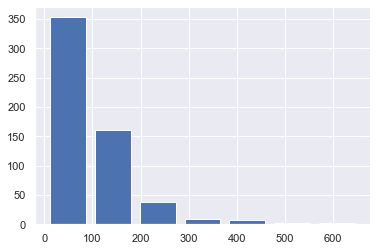

In [85]:
#Visualise the loan Amount
plt.hist(x = train['LoanAmount'], bins = 7, range=(50,700), density = False, cumulative = False, histtype = 'bar', align = 'left', rwidth=0.80)

<AxesSubplot:ylabel='Density'>

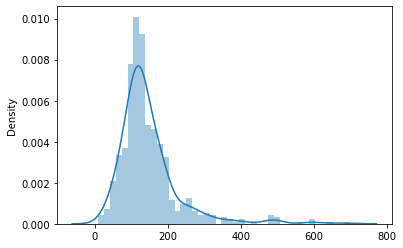

In [31]:
#lets check if it is skewed or not

sns.distplot(x = train['LoanAmount'])

**As we can see in the above figure the data is bit rightly skewed and are mostly between the range of 0 to 500**

Loan amounts taken are highest between the range of 0-100 thousand and the feature is skewed towards right side so we will use median in this case to fillup the missing values

In [90]:
#Lets check the statistics of the dataset now.
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We observe here that in the feature CoapplicantIncome the mininum is 0 which is practically not possible, difference between the 75th quartile and maximum is also too high.

In ApplicantIncome feature the difference between 75th and maximum is high which is not good, there is sign of outliers and skewness in it.

And in the fature LoanAmount there is too much difference between minimum and 25 % of the feature, also between the 75% quartile and maximum

There are signs of skewness and outliers.

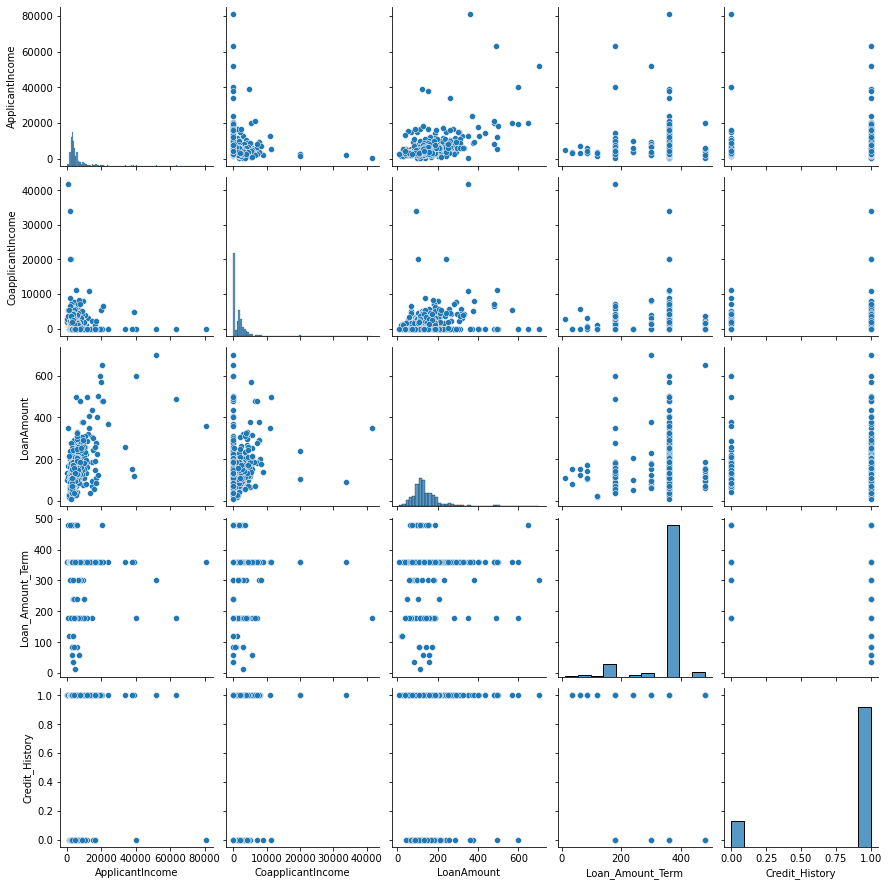

In [9]:
#Plotting pairplot for scatterplot and relation among the variables

sns.pairplot(train, dropna = True)

**We can see the relation of each variable with every other variable in the above figure**

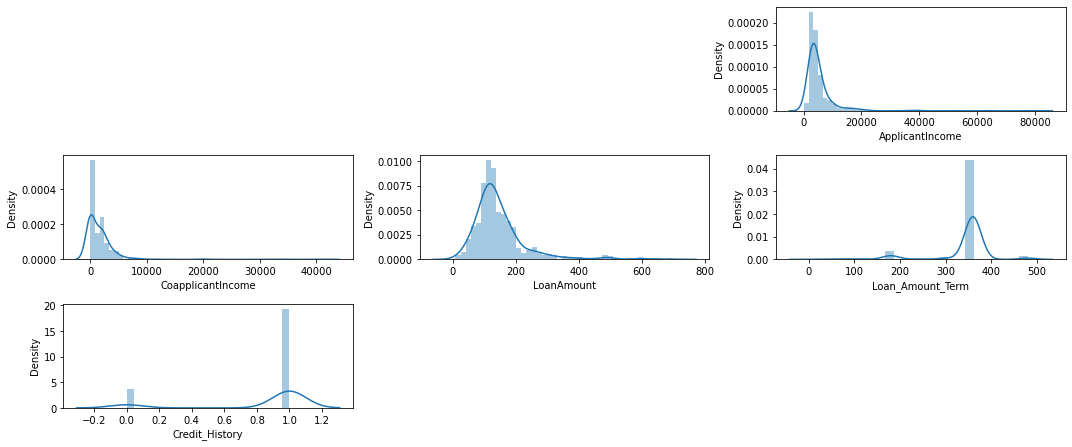

In [42]:
plt.figure(figsize=[15,10])
plotnumber = 1

for column in train:
    if train[column].dtypes=="int64" or train[column].dtypes=="float64" and plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

**There is skewness in three of the variables which are Applicant Income, Co-applicant Income and Loan Amount and are skewed right**

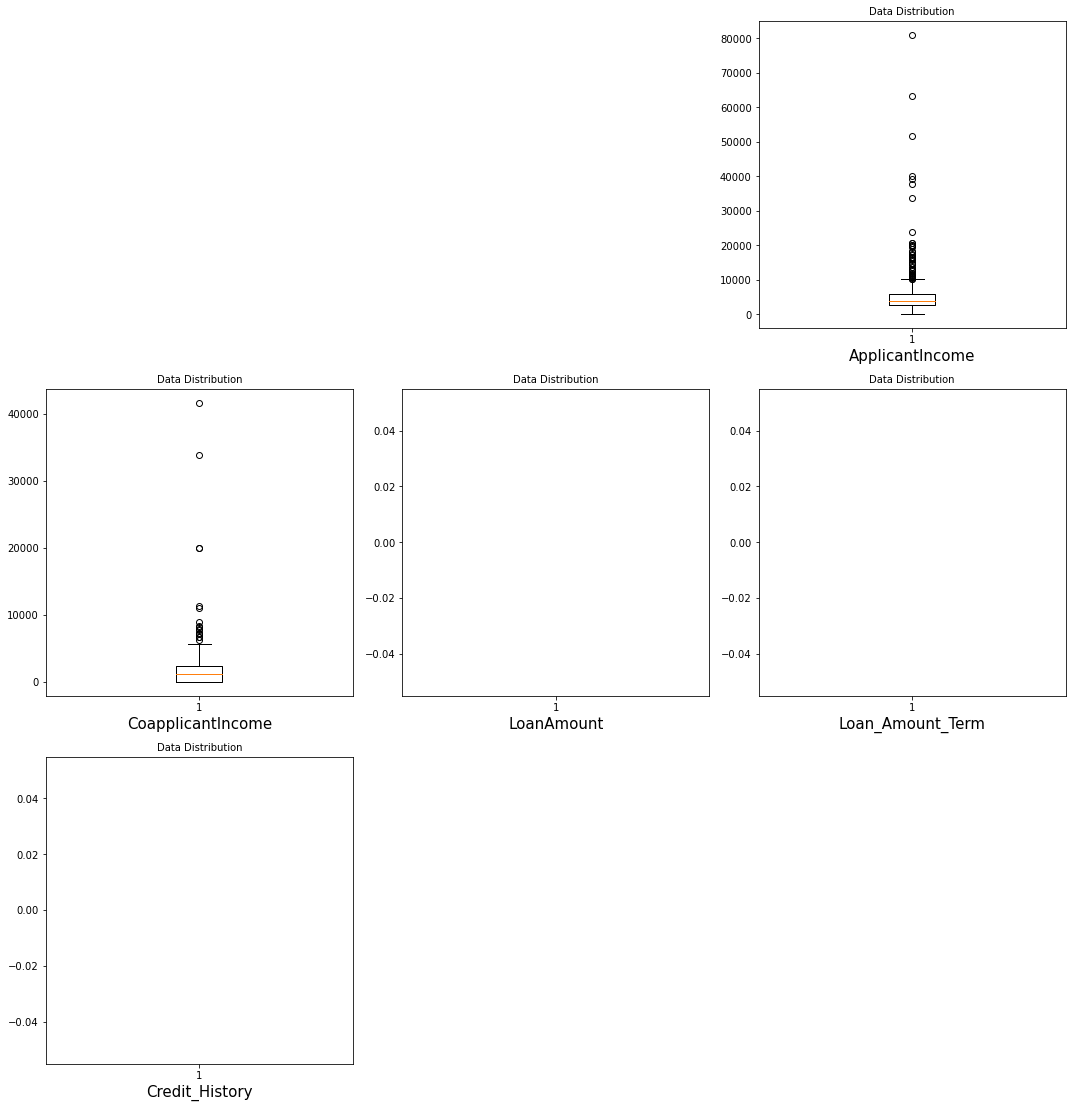

In [43]:
#Checking for outliers in the dataset.

plt.figure(figsize = [15,25])
plotnumber = 1

for column in train:
    if train[column].dtypes=="int64" or train[column].dtypes=="float64" and plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(x = train[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

**As we can see in the above figure that the outliers are present in the variables Co-applicant Income and Applicant Income**

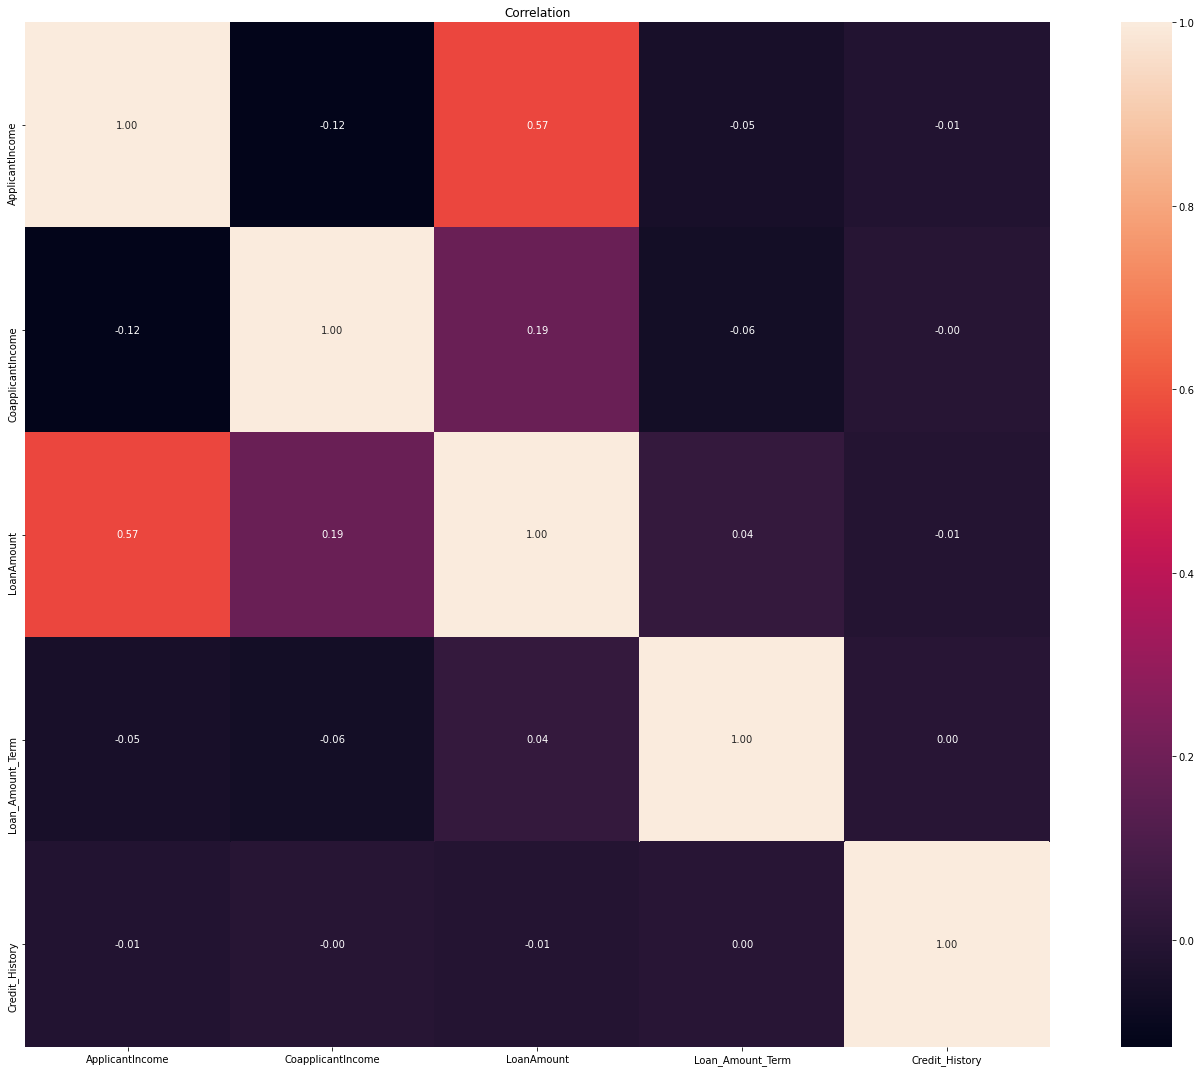

In [10]:
#Heatmap for the co-relation among variables

plt.figure(figsize = [20,15])
sns.heatmap(train.corr(),annot=True,cbar=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

In [129]:
#Doing further analysis

Gender = train.groupby(by='Gender').mean()
Gender

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term_Years
Gender,,,,,
Female,4643.473214,1914.491071,126.732143,0.848214,29.375000
Male,5573.017928,2202.156215,149.996016,0.856574,28.346614


We can see here that the amount of loan taken by male's are high when compared with females but the females took the loan amount for a longer period of time on an average.

In [133]:
Graduates = train.groupby(by='Education').mean()
Graduates

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term_Years
Education,,,,,
Graduate,5857.433333,2264.680042,153.245833,0.86875,28.743750
Not Graduate,3777.283582,1737.753731,118.910448,0.80597,27.783582


Above figures shows us that those who are graduates have taken more loan and also for a longer term when compared with Not Graduates

In [138]:
Married = train.groupby(by='Married').mean()
Dependents = train.groupby(by='Dependents').mean()
Self_Employed = train.groupby(by='Self_Employed').mean()
Property_Area = train.groupby(by='Property_Area').mean()
print("\n\n",Married)
print("\n\n",Dependents)
print("\n\n",Self_Employed)
print("\n\n",Property_Area)



          ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  \
Married                                                                   
No           4970.384977        2114.471831   128.85446        0.849765   
Yes          5633.496259        2168.386334   154.72818        0.857855   

         Loan_Amount_Term_Years  
Married                          
No                    29.276995  
Yes                   28.139651  


             ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  \
Dependents                                                                   
0               4928.680556        2145.610056  135.330556        0.861111   
1               5962.274510        1927.269608  157.421569        0.862745   
2               4926.782178        2122.636634  149.564356        0.861386   
3+              8581.215686        2676.823529  188.431373        0.784314   

            Loan_Amount_Term_Years  
Dependents                          
0             

These are the categorical columns as we can see that there are more number of females who applied and less females, married are more, those who have no dependents are also more and most of them are graduates and not self employed.

**Data Cleaning**

In [11]:
#Let's now convert all the nominal data using one hot encoding technique

train = pd.get_dummies(train, columns=['Gender','Married','Education','Property_Area','Self_Employed'], drop_first = True)
train['Dependents'] = train['Dependents'].str.rstrip('+') #Removing the '+' character from the column
train['Loan_Status'].replace({'N':0,'Y':1},inplace=True) #Replacing the values of loan_Status with 1 for yes and 0 for no
train.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,1,0


In [12]:
#Filling up all the continous variables using Knn imputer with n-neighbors as 5

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)
train.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0.0,5849.0,0.0,147.8,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [17]:
train.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Self_Employed_Yes          0
dtype: int64

In [13]:
train.skew()

Dependents                 1.015551
ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.678321
Loan_Amount_Term          -2.379668
Credit_History            -1.922231
Loan_Status               -0.809998
Gender_Male               -1.648795
Married_Yes               -0.644850
Education_Not Graduate     1.367622
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Self_Employed_Yes          2.159796
dtype: float64

In [14]:
#Using Qunatile method to remove the skewness from the above columns

q = train['ApplicantIncome'].quantile(0.99)
train = train[train['ApplicantIncome']<q]

q = train['LoanAmount'].quantile(0.99)
train = train[train['LoanAmount']<q]

q = train['CoapplicantIncome'].quantile(0.99)
train = train[train['CoapplicantIncome']<q]

train.skew()

Dependents                 1.030646
ApplicantIncome            2.302914
CoapplicantIncome          1.287002
LoanAmount                 1.512469
Loan_Amount_Term          -2.431312
Credit_History            -1.939943
Loan_Status               -0.836777
Gender_Male               -1.648754
Married_Yes               -0.639953
Education_Not Graduate     1.311180
Property_Area_Semiurban    0.510258
Property_Area_Urban        0.736021
Self_Employed_Yes          2.205097
dtype: float64

In [16]:
x = train.drop(['Loan_Status'], axis = 1)
y = train['Loan_Status']

In [17]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

for column in x:
    if x[column].dtypes=="int64" or x[column].dtypes=="float64":
        z = np.abs(stats.zscore(x[column]))
        i = np.where(z>3)[0]
print(z)

0      0.386671
1      0.386671
2      2.586177
3      0.386671
4      0.386671
         ...   
609    0.386671
610    0.386671
611    0.386671
612    0.386671
613    2.586177
Name: Self_Employed_Yes, Length: 592, dtype: float64


In [19]:
x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [20]:
y.value_counts()

1.0    410
0.0    182
Name: Loan_Status, dtype: int64

* We can clearly see here that there is very high imbalance in it hence we will use smote to balance the dataset

In [21]:
#Data Balancing using Smote as there was lot of imbalance in the labe;
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors = 5)
X, Y = oversample.fit_resample(x, y)
Y.value_counts()

0.0    410
1.0    410
Name: Loan_Status, dtype: int64

**We have balanced the dataset using smote as we can see above in the dataset**

### Model Building

In [22]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [23]:
#Importing necessary metrics to build the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [24]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [25]:
lr = LogisticRegression(verbose = 2)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()
cb = CatBoostClassifier(od_type = 'IncToDec')

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = tr
train_test_split(x_scaled, Y, test_size = 0.20, random_state = 100)

In [26]:
#training with the all of them

lr.fit(x_scaled,Y)
dt.fit(x_scaled,Y)
rf.fit(x_scaled,Y)
svc.fit(x_scaled,Y)
xgb.fit(x_scaled,Y)
cb.fit(x_scaled,Y)

print("All Models Trained")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


[20:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.009465
0:	learn: 0.6885227	total: 201ms	remaining: 3m 20s
1:	learn: 0.6835059	total: 204ms	remaining: 1m 41s
2:	learn: 0.6781030	total: 208ms	remaining: 1m 9s
3:	learn: 0.6722483	total: 212ms	remaining: 52.7s
4:	learn: 0.6671330	total: 216ms	remaining: 42.9s
5:	learn: 0.6620884	total: 219ms	remaining: 36.3s
6:	learn: 0.6570457	total: 223ms	remaining: 31.6s
7:	learn: 0.6515740	total: 226ms	remaining: 28.1s
8:	learn: 0.6469925	total: 230ms	remaining: 25.3s
9:	learn: 0.6420082	total: 234ms	remaining: 23.1s
10:	learn: 0.6377345	total: 237ms	remaining: 21.3s
11:	learn: 0.6337827	total: 241ms	remaining: 19.8s
12:	learn: 0.6288049	total: 245ms	remaining: 18.6s
13:	l

192:	learn: 0.3606675	total: 907ms	remaining: 3.79s
193:	learn: 0.3599746	total: 911ms	remaining: 3.79s
194:	learn: 0.3594673	total: 915ms	remaining: 3.78s
195:	learn: 0.3590275	total: 919ms	remaining: 3.77s
196:	learn: 0.3582339	total: 922ms	remaining: 3.76s
197:	learn: 0.3577329	total: 926ms	remaining: 3.75s
198:	learn: 0.3573083	total: 930ms	remaining: 3.74s
199:	learn: 0.3569597	total: 934ms	remaining: 3.74s
200:	learn: 0.3564221	total: 938ms	remaining: 3.73s
201:	learn: 0.3557020	total: 942ms	remaining: 3.72s
202:	learn: 0.3551600	total: 945ms	remaining: 3.71s
203:	learn: 0.3546277	total: 949ms	remaining: 3.7s
204:	learn: 0.3542231	total: 953ms	remaining: 3.69s
205:	learn: 0.3537264	total: 956ms	remaining: 3.69s
206:	learn: 0.3533662	total: 960ms	remaining: 3.68s
207:	learn: 0.3529835	total: 964ms	remaining: 3.67s
208:	learn: 0.3525586	total: 968ms	remaining: 3.66s
209:	learn: 0.3520736	total: 971ms	remaining: 3.65s
210:	learn: 0.3517253	total: 975ms	remaining: 3.64s
211:	learn: 0

390:	learn: 0.2892008	total: 1.62s	remaining: 2.53s
391:	learn: 0.2888923	total: 1.63s	remaining: 2.53s
392:	learn: 0.2888117	total: 1.63s	remaining: 2.52s
393:	learn: 0.2885294	total: 1.64s	remaining: 2.52s
394:	learn: 0.2882301	total: 1.64s	remaining: 2.51s
395:	learn: 0.2879598	total: 1.65s	remaining: 2.51s
396:	learn: 0.2877476	total: 1.65s	remaining: 2.5s
397:	learn: 0.2874207	total: 1.65s	remaining: 2.5s
398:	learn: 0.2871970	total: 1.66s	remaining: 2.5s
399:	learn: 0.2868842	total: 1.66s	remaining: 2.49s
400:	learn: 0.2867706	total: 1.66s	remaining: 2.48s
401:	learn: 0.2865215	total: 1.67s	remaining: 2.48s
402:	learn: 0.2861245	total: 1.67s	remaining: 2.47s
403:	learn: 0.2858871	total: 1.68s	remaining: 2.47s
404:	learn: 0.2856012	total: 1.68s	remaining: 2.47s
405:	learn: 0.2853602	total: 1.68s	remaining: 2.46s
406:	learn: 0.2851180	total: 1.69s	remaining: 2.46s
407:	learn: 0.2847731	total: 1.69s	remaining: 2.45s
408:	learn: 0.2844412	total: 1.69s	remaining: 2.45s
409:	learn: 0.2

585:	learn: 0.2466442	total: 2.32s	remaining: 1.64s
586:	learn: 0.2465686	total: 2.33s	remaining: 1.64s
587:	learn: 0.2462385	total: 2.33s	remaining: 1.63s
588:	learn: 0.2460655	total: 2.34s	remaining: 1.63s
589:	learn: 0.2458627	total: 2.34s	remaining: 1.63s
590:	learn: 0.2456528	total: 2.35s	remaining: 1.62s
591:	learn: 0.2453664	total: 2.35s	remaining: 1.62s
592:	learn: 0.2453036	total: 2.35s	remaining: 1.62s
593:	learn: 0.2451512	total: 2.36s	remaining: 1.61s
594:	learn: 0.2450234	total: 2.36s	remaining: 1.61s
595:	learn: 0.2447806	total: 2.37s	remaining: 1.6s
596:	learn: 0.2444257	total: 2.38s	remaining: 1.61s
597:	learn: 0.2443283	total: 2.39s	remaining: 1.6s
598:	learn: 0.2441819	total: 2.39s	remaining: 1.6s
599:	learn: 0.2438531	total: 2.4s	remaining: 1.6s
600:	learn: 0.2436515	total: 2.4s	remaining: 1.59s
601:	learn: 0.2435706	total: 2.4s	remaining: 1.59s
602:	learn: 0.2434431	total: 2.41s	remaining: 1.59s
603:	learn: 0.2432009	total: 2.42s	remaining: 1.58s
604:	learn: 0.24308

761:	learn: 0.2166020	total: 3.03s	remaining: 947ms
762:	learn: 0.2165078	total: 3.04s	remaining: 943ms
763:	learn: 0.2163566	total: 3.04s	remaining: 939ms
764:	learn: 0.2162847	total: 3.04s	remaining: 935ms
765:	learn: 0.2161033	total: 3.05s	remaining: 931ms
766:	learn: 0.2160169	total: 3.05s	remaining: 927ms
767:	learn: 0.2159229	total: 3.06s	remaining: 923ms
768:	learn: 0.2156566	total: 3.06s	remaining: 919ms
769:	learn: 0.2156088	total: 3.06s	remaining: 915ms
770:	learn: 0.2154676	total: 3.07s	remaining: 912ms
771:	learn: 0.2152479	total: 3.08s	remaining: 908ms
772:	learn: 0.2150637	total: 3.08s	remaining: 904ms
773:	learn: 0.2149884	total: 3.08s	remaining: 900ms
774:	learn: 0.2146437	total: 3.09s	remaining: 896ms
775:	learn: 0.2146109	total: 3.09s	remaining: 893ms
776:	learn: 0.2144738	total: 3.1s	remaining: 889ms
777:	learn: 0.2142552	total: 3.1s	remaining: 884ms
778:	learn: 0.2142415	total: 3.1s	remaining: 880ms
779:	learn: 0.2141870	total: 3.11s	remaining: 876ms
780:	learn: 0.2

939:	learn: 0.1934596	total: 3.73s	remaining: 238ms
940:	learn: 0.1933976	total: 3.73s	remaining: 234ms
941:	learn: 0.1931994	total: 3.74s	remaining: 230ms
942:	learn: 0.1931114	total: 3.74s	remaining: 226ms
943:	learn: 0.1930303	total: 3.75s	remaining: 222ms
944:	learn: 0.1928105	total: 3.75s	remaining: 218ms
945:	learn: 0.1926838	total: 3.75s	remaining: 214ms
946:	learn: 0.1925567	total: 3.76s	remaining: 210ms
947:	learn: 0.1925367	total: 3.76s	remaining: 206ms
948:	learn: 0.1922676	total: 3.77s	remaining: 202ms
949:	learn: 0.1922480	total: 3.77s	remaining: 198ms
950:	learn: 0.1920953	total: 3.77s	remaining: 194ms
951:	learn: 0.1919964	total: 3.78s	remaining: 190ms
952:	learn: 0.1918608	total: 3.78s	remaining: 187ms
953:	learn: 0.1916233	total: 3.79s	remaining: 183ms
954:	learn: 0.1915840	total: 3.79s	remaining: 179ms
955:	learn: 0.1915349	total: 3.79s	remaining: 175ms
956:	learn: 0.1913153	total: 3.79s	remaining: 171ms
957:	learn: 0.1912405	total: 3.8s	remaining: 167ms
958:	learn: 0

In [28]:
#Accuracy score
print('Logistic Regression =', accuracy_score(Y,lr.predict(x_scaled)))
print('Decision Tree =', accuracy_score(Y,dt.predict(x_scaled)))
print('Random Forest =', accuracy_score(Y,rf.predict(x_scaled)))
print('SVC =', accuracy_score(Y,svc.predict(x_scaled)))
print('Xtreme Gradient Boost =', accuracy_score(Y,xgb.predict(x_scaled)))
print('Cat Boost =', accuracy_score(Y,cb.predict(x_scaled)))

Logistic Regression = 0.776829268292683
Decision Tree = 1.0
Random Forest = 1.0
SVC = 0.8402439024390244
Xtreme Gradient Boost = 1.0
Cat Boost = 0.9463414634146341


In [29]:
#Lets check the roc_auc_score of every model

print('Logistic Regression =', roc_auc_score(Y,lr.predict(x_scaled)))
print('Decision Tree =', roc_auc_score(Y,dt.predict(x_scaled)))
print('Random Forest =', roc_auc_score(Y,rf.predict(x_scaled)))
print('SVC =', roc_auc_score(Y,svc.predict(x_scaled)))
print('Xtreme Gradient Boost =', roc_auc_score(Y,xgb.predict(x_scaled)))
print('Cat Boost =', roc_auc_score(Y,cb.predict(x_scaled)))

Logistic Regression = 0.776829268292683
Decision Tree = 1.0
Random Forest = 1.0
SVC = 0.8402439024390244
Xtreme Gradient Boost = 1.0
Cat Boost = 0.9463414634146342


In [31]:
#Classification Report

print('Classification report of Logistic Regression \n', classification_report(Y,lr.predict(x_scaled)))
print('Classification report of Decision Tree \n', classification_report(Y,dt.predict(x_scaled)))
print('Classification report of Random Forest \n', classification_report(Y,rf.predict(x_scaled)))
print('Classification report of SVC \n', classification_report(Y,svc.predict(x_scaled)))
print('Classification report of Xtreme Gradient Boost \n', classification_report(Y,xgb.predict(x_scaled)))
print('Cat Boost \n', classification_report(Y,cb.predict(x_scaled)))

Classification report of Logistic Regression 
               precision    recall  f1-score   support

         0.0       0.86      0.66      0.75       410
         1.0       0.72      0.90      0.80       410

    accuracy                           0.78       820
   macro avg       0.79      0.78      0.77       820
weighted avg       0.79      0.78      0.77       820

Classification report of Decision Tree 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       410
         1.0       1.00      1.00      1.00       410

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820

Classification report of Random Forest 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       410
         1.0       1.00      1.00      1.00       410

    accuracy                           1.00       820

Confusion Matrix of Logistic Regression

 AxesSubplot(0.125,0.125;0.62x0.755)


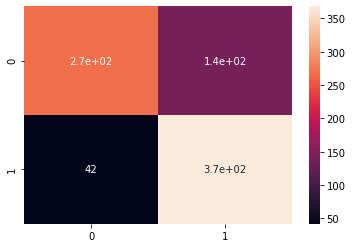

In [32]:
print('Confusion Matrix of Logistic Regression\n\n', sns.heatmap(confusion_matrix(Y,lr.predict(x_scaled)),annot = True))

Confusion Matrix of Decision Tree
 AxesSubplot(0.125,0.125;0.62x0.755)


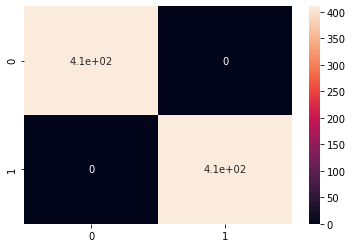

In [33]:
print('Confusion Matrix of Decision Tree\n', sns.heatmap(confusion_matrix(Y,dt.predict(x_scaled)),annot = True))

Confusion Matrix of Random Forest 
 AxesSubplot(0.125,0.125;0.62x0.755)


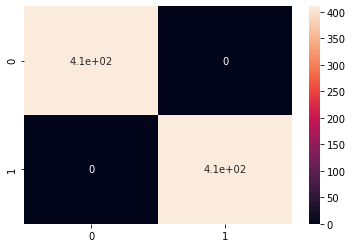

In [34]:
print('Confusion Matrix of Random Forest \n', sns.heatmap(confusion_matrix(Y,rf.predict(x_scaled)),annot = True))

Confusion Matrix of SVC 
 AxesSubplot(0.241667,0.125;0.503333x0.755)


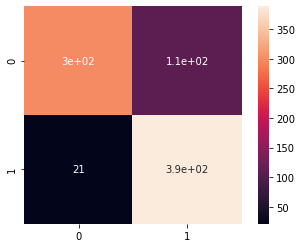

In [35]:
print('Confusion Matrix of SVC \n', sns.heatmap(confusion_matrix(Y,svc.predict(x_scaled)),annot = True, square=True))

Confusion Matrix of Xtreme Gradient Boost 
 AxesSubplot(0.125,0.125;0.62x0.755)


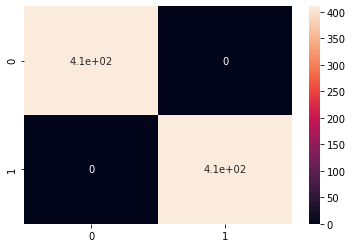

In [36]:
print('Confusion Matrix of Xtreme Gradient Boost \n', sns.heatmap(confusion_matrix(Y,xgb.predict(x_scaled)),annot = True))

Confusion Matrix of Cat Boost 
 AxesSubplot(0.125,0.125;0.62x0.755)


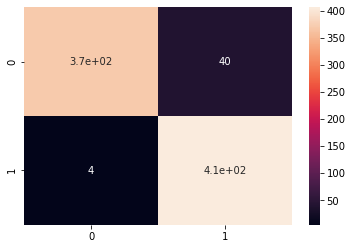

In [37]:
print('Confusion Matrix of Cat Boost \n', sns.heatmap(confusion_matrix(Y,cb.predict(x_scaled)),annot = True))

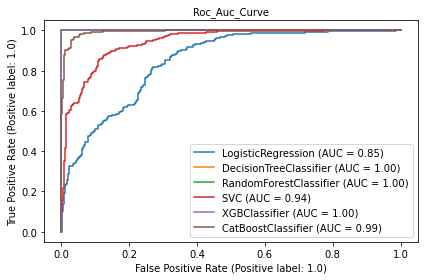

In [38]:
curve = plot_roc_curve(lr,x_scaled,Y)

plot_roc_curve(dt,x_scaled,Y,ax=curve.ax_)

plot_roc_curve(rf,x_scaled,Y,ax=curve.ax_)

plot_roc_curve(svc,x_scaled,Y,ax=curve.ax_)

plot_roc_curve(xgb,x_scaled,Y,ax=curve.ax_)

plot_roc_curve(cb,x_scaled,Y,ax=curve.ax_)


plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

**After checking all the parameters we found that three models which are Decision Tree, Random Forest and XGB are giving us the best scores among all rest of the models hence we will proceed with only these three**

In [99]:
#Doing Cross Validation for all models

from sklearn.model_selection import cross_val_score

print("CV score for Random forest is {}".format(cross_val_score(rf,x,y,cv=5).mean()))

print("\n\n CV score for Decision Trees is {}".format(cross_val_score(dt,x,y,cv=5).mean()))

print("\n\nCV score for XGB is {}".format(cross_val_score(xgb,x,y,cv=5).mean()))

print("\n\nCV score for Logistic Regression is {}".format(cross_val_score(lr,x,y,cv=5).mean()))

print("\n\nCV score for SupportVector is {}".format(cross_val_score(svc,x,y,cv=5).mean()))

print("\n\nCV score for CatboostClassifier is {}".format(cross_val_score(cb,x,y,cv=5).mean()))



CV score for Random forest is 0.7939609742201965


 CV score for Decision Trees is 0.7365190143854152
[21:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work



CV score for Logistic Regression is 0.8091582395670134


CV score for SupportVector is 0.6925794046432132
Learning rate set to 0.007483
0:	learn: 0.6892247	total: 4.5ms	remaining: 4.49s
1:	learn: 0.6854527	total: 6.56ms	remaining: 3.27s
2:	learn: 0.6813938	total: 10.6ms	remaining: 3.53s
3:	learn: 0.6775809	total: 13.6ms	remaining: 3.38s
4:	learn: 0.6735863	total: 16.2ms	remaining: 3.23s
5:	learn: 0.6698223	total: 18.7ms	remaining: 3.1s
6:	learn: 0.6660507	total: 21.2ms	remaining: 3.01s
7:	learn: 0.6623302	total: 23.7ms	remaining: 2.94s
8:	learn: 0.6586174	total: 26.3ms	remaining: 2.9s
9:	learn: 0.6549924	total: 28.7ms	remaining: 2.84s
10:	learn: 0.6513003	total: 31.1ms	remaining: 2.79s
11:	learn: 0.6476640	total: 33.6ms	remaining: 2.77s
12:	learn: 0.6441088	total: 36.1ms	remaining: 2.74s
13:	learn: 0.6404137	total: 38.8ms	remaining: 2.73s
14:	learn: 0.6366430	total: 41.3ms	remaining: 2.71s
15:	learn: 0.6332960	total: 43.7ms	remaining: 2.69s
16:	learn: 0.6303231	total: 46.3ms	remainin

206:	learn: 0.4053477	total: 500ms	remaining: 1.91s
207:	learn: 0.4052201	total: 501ms	remaining: 1.91s
208:	learn: 0.4047605	total: 504ms	remaining: 1.91s
209:	learn: 0.4041832	total: 506ms	remaining: 1.9s
210:	learn: 0.4038468	total: 509ms	remaining: 1.9s
211:	learn: 0.4036715	total: 510ms	remaining: 1.9s
212:	learn: 0.4032134	total: 513ms	remaining: 1.89s
213:	learn: 0.4027758	total: 515ms	remaining: 1.89s
214:	learn: 0.4021618	total: 518ms	remaining: 1.89s
215:	learn: 0.4018554	total: 520ms	remaining: 1.89s
216:	learn: 0.4013397	total: 523ms	remaining: 1.89s
217:	learn: 0.4010542	total: 525ms	remaining: 1.88s
218:	learn: 0.4006922	total: 528ms	remaining: 1.88s
219:	learn: 0.4003476	total: 531ms	remaining: 1.88s
220:	learn: 0.3999282	total: 534ms	remaining: 1.88s
221:	learn: 0.3992768	total: 536ms	remaining: 1.88s
222:	learn: 0.3985614	total: 539ms	remaining: 1.88s
223:	learn: 0.3982575	total: 541ms	remaining: 1.87s
224:	learn: 0.3981067	total: 543ms	remaining: 1.87s
225:	learn: 0.3

415:	learn: 0.3351404	total: 1.01s	remaining: 1.42s
416:	learn: 0.3349867	total: 1.01s	remaining: 1.42s
417:	learn: 0.3349588	total: 1.01s	remaining: 1.41s
418:	learn: 0.3346344	total: 1.02s	remaining: 1.41s
419:	learn: 0.3343960	total: 1.02s	remaining: 1.41s
420:	learn: 0.3340914	total: 1.02s	remaining: 1.4s
421:	learn: 0.3339958	total: 1.02s	remaining: 1.4s
422:	learn: 0.3336839	total: 1.03s	remaining: 1.4s
423:	learn: 0.3335567	total: 1.03s	remaining: 1.4s
424:	learn: 0.3334878	total: 1.03s	remaining: 1.4s
425:	learn: 0.3332476	total: 1.03s	remaining: 1.39s
426:	learn: 0.3330347	total: 1.04s	remaining: 1.39s
427:	learn: 0.3329990	total: 1.04s	remaining: 1.39s
428:	learn: 0.3326425	total: 1.04s	remaining: 1.39s
429:	learn: 0.3325071	total: 1.04s	remaining: 1.38s
430:	learn: 0.3321238	total: 1.05s	remaining: 1.38s
431:	learn: 0.3318933	total: 1.05s	remaining: 1.38s
432:	learn: 0.3315983	total: 1.05s	remaining: 1.38s
433:	learn: 0.3314000	total: 1.05s	remaining: 1.37s
434:	learn: 0.331

626:	learn: 0.2925669	total: 1.52s	remaining: 902ms
627:	learn: 0.2922682	total: 1.52s	remaining: 900ms
628:	learn: 0.2922096	total: 1.52s	remaining: 898ms
629:	learn: 0.2921800	total: 1.52s	remaining: 896ms
630:	learn: 0.2919958	total: 1.53s	remaining: 893ms
631:	learn: 0.2919190	total: 1.53s	remaining: 891ms
632:	learn: 0.2917196	total: 1.53s	remaining: 888ms
633:	learn: 0.2915390	total: 1.53s	remaining: 886ms
634:	learn: 0.2914128	total: 1.54s	remaining: 884ms
635:	learn: 0.2912719	total: 1.54s	remaining: 881ms
636:	learn: 0.2911272	total: 1.54s	remaining: 879ms
637:	learn: 0.2909748	total: 1.54s	remaining: 877ms
638:	learn: 0.2908651	total: 1.55s	remaining: 875ms
639:	learn: 0.2907611	total: 1.55s	remaining: 873ms
640:	learn: 0.2905300	total: 1.55s	remaining: 870ms
641:	learn: 0.2902971	total: 1.56s	remaining: 868ms
642:	learn: 0.2901796	total: 1.56s	remaining: 865ms
643:	learn: 0.2898950	total: 1.56s	remaining: 863ms
644:	learn: 0.2896355	total: 1.56s	remaining: 861ms
645:	learn: 

828:	learn: 0.2581445	total: 2.01s	remaining: 415ms
829:	learn: 0.2578006	total: 2.01s	remaining: 412ms
830:	learn: 0.2576105	total: 2.02s	remaining: 410ms
831:	learn: 0.2573195	total: 2.02s	remaining: 408ms
832:	learn: 0.2570234	total: 2.02s	remaining: 405ms
833:	learn: 0.2570053	total: 2.02s	remaining: 403ms
834:	learn: 0.2568979	total: 2.02s	remaining: 400ms
835:	learn: 0.2567187	total: 2.03s	remaining: 398ms
836:	learn: 0.2565643	total: 2.03s	remaining: 396ms
837:	learn: 0.2564796	total: 2.03s	remaining: 393ms
838:	learn: 0.2563835	total: 2.04s	remaining: 391ms
839:	learn: 0.2559904	total: 2.04s	remaining: 389ms
840:	learn: 0.2559473	total: 2.04s	remaining: 386ms
841:	learn: 0.2558146	total: 2.04s	remaining: 384ms
842:	learn: 0.2553925	total: 2.05s	remaining: 381ms
843:	learn: 0.2552493	total: 2.05s	remaining: 379ms
844:	learn: 0.2551163	total: 2.05s	remaining: 376ms
845:	learn: 0.2549925	total: 2.05s	remaining: 374ms
846:	learn: 0.2549648	total: 2.06s	remaining: 372ms
847:	learn: 

Learning rate set to 0.007483
0:	learn: 0.6887658	total: 4.2ms	remaining: 4.19s
1:	learn: 0.6845555	total: 7.21ms	remaining: 3.6s
2:	learn: 0.6803697	total: 12.2ms	remaining: 4.04s
3:	learn: 0.6761601	total: 17ms	remaining: 4.25s
4:	learn: 0.6720074	total: 21.6ms	remaining: 4.3s
5:	learn: 0.6677106	total: 26.2ms	remaining: 4.34s
6:	learn: 0.6636971	total: 29.9ms	remaining: 4.24s
7:	learn: 0.6598801	total: 33.2ms	remaining: 4.12s
8:	learn: 0.6560124	total: 36.1ms	remaining: 3.97s
9:	learn: 0.6520534	total: 38.8ms	remaining: 3.85s
10:	learn: 0.6482648	total: 41.6ms	remaining: 3.74s
11:	learn: 0.6445354	total: 44ms	remaining: 3.63s
12:	learn: 0.6407764	total: 46.3ms	remaining: 3.52s
13:	learn: 0.6371078	total: 48.8ms	remaining: 3.43s
14:	learn: 0.6331786	total: 51.1ms	remaining: 3.35s
15:	learn: 0.6298929	total: 53.4ms	remaining: 3.28s
16:	learn: 0.6265750	total: 55.8ms	remaining: 3.23s
17:	learn: 0.6231611	total: 58.1ms	remaining: 3.17s
18:	learn: 0.6194202	total: 60.5ms	remaining: 3.12s

214:	learn: 0.3910126	total: 506ms	remaining: 1.85s
215:	learn: 0.3904968	total: 509ms	remaining: 1.85s
216:	learn: 0.3901835	total: 511ms	remaining: 1.84s
217:	learn: 0.3899277	total: 514ms	remaining: 1.84s
218:	learn: 0.3895927	total: 516ms	remaining: 1.84s
219:	learn: 0.3890655	total: 519ms	remaining: 1.84s
220:	learn: 0.3886687	total: 521ms	remaining: 1.84s
221:	learn: 0.3884408	total: 524ms	remaining: 1.83s
222:	learn: 0.3876787	total: 526ms	remaining: 1.83s
223:	learn: 0.3874791	total: 528ms	remaining: 1.83s
224:	learn: 0.3870758	total: 531ms	remaining: 1.83s
225:	learn: 0.3866994	total: 534ms	remaining: 1.83s
226:	learn: 0.3863903	total: 537ms	remaining: 1.83s
227:	learn: 0.3859756	total: 540ms	remaining: 1.83s
228:	learn: 0.3855073	total: 542ms	remaining: 1.82s
229:	learn: 0.3852193	total: 545ms	remaining: 1.82s
230:	learn: 0.3847835	total: 547ms	remaining: 1.82s
231:	learn: 0.3844353	total: 550ms	remaining: 1.82s
232:	learn: 0.3839208	total: 552ms	remaining: 1.82s
233:	learn: 

414:	learn: 0.3274721	total: 1000ms	remaining: 1.41s
415:	learn: 0.3273476	total: 1s	remaining: 1.41s
416:	learn: 0.3270695	total: 1s	remaining: 1.41s
417:	learn: 0.3268642	total: 1.01s	remaining: 1.4s
418:	learn: 0.3266094	total: 1.01s	remaining: 1.4s
419:	learn: 0.3264202	total: 1.01s	remaining: 1.4s
420:	learn: 0.3261732	total: 1.02s	remaining: 1.4s
421:	learn: 0.3259152	total: 1.02s	remaining: 1.4s
422:	learn: 0.3256491	total: 1.02s	remaining: 1.39s
423:	learn: 0.3253541	total: 1.02s	remaining: 1.39s
424:	learn: 0.3250214	total: 1.03s	remaining: 1.39s
425:	learn: 0.3248918	total: 1.03s	remaining: 1.39s
426:	learn: 0.3246030	total: 1.03s	remaining: 1.39s
427:	learn: 0.3244587	total: 1.04s	remaining: 1.39s
428:	learn: 0.3242447	total: 1.04s	remaining: 1.38s
429:	learn: 0.3238857	total: 1.04s	remaining: 1.38s
430:	learn: 0.3236080	total: 1.04s	remaining: 1.38s
431:	learn: 0.3233130	total: 1.05s	remaining: 1.38s
432:	learn: 0.3230990	total: 1.05s	remaining: 1.37s
433:	learn: 0.3227345	

622:	learn: 0.2833208	total: 1.51s	remaining: 914ms
623:	learn: 0.2830915	total: 1.51s	remaining: 912ms
624:	learn: 0.2829391	total: 1.52s	remaining: 910ms
625:	learn: 0.2826473	total: 1.52s	remaining: 907ms
626:	learn: 0.2824744	total: 1.52s	remaining: 905ms
627:	learn: 0.2824001	total: 1.52s	remaining: 903ms
628:	learn: 0.2822768	total: 1.53s	remaining: 901ms
629:	learn: 0.2820893	total: 1.53s	remaining: 898ms
630:	learn: 0.2818958	total: 1.53s	remaining: 896ms
631:	learn: 0.2816610	total: 1.53s	remaining: 894ms
632:	learn: 0.2812710	total: 1.54s	remaining: 891ms
633:	learn: 0.2810213	total: 1.54s	remaining: 890ms
634:	learn: 0.2807435	total: 1.54s	remaining: 888ms
635:	learn: 0.2805691	total: 1.55s	remaining: 885ms
636:	learn: 0.2802245	total: 1.55s	remaining: 883ms
637:	learn: 0.2800857	total: 1.55s	remaining: 880ms
638:	learn: 0.2799167	total: 1.55s	remaining: 878ms
639:	learn: 0.2796467	total: 1.56s	remaining: 875ms
640:	learn: 0.2795029	total: 1.56s	remaining: 873ms
641:	learn: 

831:	learn: 0.2458070	total: 2.02s	remaining: 408ms
832:	learn: 0.2455622	total: 2.02s	remaining: 406ms
833:	learn: 0.2454588	total: 2.02s	remaining: 403ms
834:	learn: 0.2451102	total: 2.03s	remaining: 401ms
835:	learn: 0.2449000	total: 2.03s	remaining: 398ms
836:	learn: 0.2448217	total: 2.03s	remaining: 396ms
837:	learn: 0.2446048	total: 2.04s	remaining: 394ms
838:	learn: 0.2444951	total: 2.04s	remaining: 391ms
839:	learn: 0.2441819	total: 2.04s	remaining: 389ms
840:	learn: 0.2440681	total: 2.04s	remaining: 386ms
841:	learn: 0.2438984	total: 2.05s	remaining: 384ms
842:	learn: 0.2437905	total: 2.05s	remaining: 382ms
843:	learn: 0.2436706	total: 2.05s	remaining: 379ms
844:	learn: 0.2434897	total: 2.05s	remaining: 377ms
845:	learn: 0.2432781	total: 2.06s	remaining: 374ms
846:	learn: 0.2432388	total: 2.06s	remaining: 372ms
847:	learn: 0.2431106	total: 2.06s	remaining: 370ms
848:	learn: 0.2428827	total: 2.06s	remaining: 367ms
849:	learn: 0.2428494	total: 2.07s	remaining: 365ms
850:	learn: 

Learning rate set to 0.00749
0:	learn: 0.6888126	total: 1.28ms	remaining: 1.28s
1:	learn: 0.6845620	total: 3.94ms	remaining: 1.96s
2:	learn: 0.6801665	total: 6.74ms	remaining: 2.24s
3:	learn: 0.6760903	total: 9.29ms	remaining: 2.31s
4:	learn: 0.6717660	total: 11.7ms	remaining: 2.33s
5:	learn: 0.6676893	total: 14.2ms	remaining: 2.36s
6:	learn: 0.6633722	total: 16.8ms	remaining: 2.38s
7:	learn: 0.6594277	total: 19.1ms	remaining: 2.36s
8:	learn: 0.6555017	total: 21.5ms	remaining: 2.36s
9:	learn: 0.6517094	total: 23.9ms	remaining: 2.37s
10:	learn: 0.6476821	total: 26.4ms	remaining: 2.38s
11:	learn: 0.6440939	total: 28.1ms	remaining: 2.31s
12:	learn: 0.6398670	total: 30.5ms	remaining: 2.32s
13:	learn: 0.6362249	total: 32.1ms	remaining: 2.26s
14:	learn: 0.6326686	total: 34.6ms	remaining: 2.27s
15:	learn: 0.6288482	total: 37.2ms	remaining: 2.28s
16:	learn: 0.6252289	total: 39.7ms	remaining: 2.3s
17:	learn: 0.6220226	total: 41.1ms	remaining: 2.24s
18:	learn: 0.6190220	total: 43ms	remaining: 2.

212:	learn: 0.3909168	total: 498ms	remaining: 1.84s
213:	learn: 0.3904122	total: 501ms	remaining: 1.84s
214:	learn: 0.3899102	total: 504ms	remaining: 1.84s
215:	learn: 0.3893745	total: 507ms	remaining: 1.84s
216:	learn: 0.3889496	total: 509ms	remaining: 1.84s
217:	learn: 0.3885376	total: 512ms	remaining: 1.83s
218:	learn: 0.3883881	total: 514ms	remaining: 1.83s
219:	learn: 0.3879071	total: 517ms	remaining: 1.83s
220:	learn: 0.3872794	total: 520ms	remaining: 1.83s
221:	learn: 0.3871296	total: 522ms	remaining: 1.83s
222:	learn: 0.3867076	total: 524ms	remaining: 1.83s
223:	learn: 0.3863179	total: 528ms	remaining: 1.83s
224:	learn: 0.3861446	total: 530ms	remaining: 1.83s
225:	learn: 0.3856988	total: 533ms	remaining: 1.82s
226:	learn: 0.3850656	total: 535ms	remaining: 1.82s
227:	learn: 0.3843802	total: 538ms	remaining: 1.82s
228:	learn: 0.3841467	total: 540ms	remaining: 1.82s
229:	learn: 0.3836180	total: 542ms	remaining: 1.82s
230:	learn: 0.3831746	total: 546ms	remaining: 1.82s
231:	learn: 

416:	learn: 0.3281858	total: 1.01s	remaining: 1.41s
417:	learn: 0.3278373	total: 1.01s	remaining: 1.41s
418:	learn: 0.3276048	total: 1.01s	remaining: 1.41s
419:	learn: 0.3272899	total: 1.02s	remaining: 1.4s
420:	learn: 0.3271441	total: 1.02s	remaining: 1.4s
421:	learn: 0.3268819	total: 1.02s	remaining: 1.4s
422:	learn: 0.3266113	total: 1.02s	remaining: 1.4s
423:	learn: 0.3263222	total: 1.03s	remaining: 1.4s
424:	learn: 0.3262041	total: 1.03s	remaining: 1.39s
425:	learn: 0.3260056	total: 1.03s	remaining: 1.39s
426:	learn: 0.3259831	total: 1.03s	remaining: 1.39s
427:	learn: 0.3257571	total: 1.04s	remaining: 1.39s
428:	learn: 0.3255262	total: 1.04s	remaining: 1.38s
429:	learn: 0.3254586	total: 1.04s	remaining: 1.38s
430:	learn: 0.3253069	total: 1.04s	remaining: 1.38s
431:	learn: 0.3250883	total: 1.05s	remaining: 1.38s
432:	learn: 0.3248814	total: 1.05s	remaining: 1.37s
433:	learn: 0.3246367	total: 1.05s	remaining: 1.37s
434:	learn: 0.3242531	total: 1.05s	remaining: 1.37s
435:	learn: 0.324

622:	learn: 0.2889979	total: 1.52s	remaining: 918ms
623:	learn: 0.2889118	total: 1.52s	remaining: 916ms
624:	learn: 0.2887075	total: 1.52s	remaining: 914ms
625:	learn: 0.2884573	total: 1.52s	remaining: 911ms
626:	learn: 0.2882545	total: 1.53s	remaining: 909ms
627:	learn: 0.2881193	total: 1.53s	remaining: 906ms
628:	learn: 0.2879997	total: 1.53s	remaining: 904ms
629:	learn: 0.2877712	total: 1.53s	remaining: 902ms
630:	learn: 0.2875743	total: 1.54s	remaining: 900ms
631:	learn: 0.2873521	total: 1.54s	remaining: 897ms
632:	learn: 0.2872261	total: 1.54s	remaining: 895ms
633:	learn: 0.2870038	total: 1.55s	remaining: 893ms
634:	learn: 0.2867258	total: 1.55s	remaining: 891ms
635:	learn: 0.2865736	total: 1.55s	remaining: 889ms
636:	learn: 0.2864486	total: 1.55s	remaining: 886ms
637:	learn: 0.2861034	total: 1.56s	remaining: 884ms
638:	learn: 0.2859568	total: 1.56s	remaining: 881ms
639:	learn: 0.2858038	total: 1.56s	remaining: 879ms
640:	learn: 0.2856593	total: 1.56s	remaining: 876ms
641:	learn: 

829:	learn: 0.2553238	total: 2.03s	remaining: 415ms
830:	learn: 0.2552880	total: 2.03s	remaining: 413ms
831:	learn: 0.2552266	total: 2.03s	remaining: 411ms
832:	learn: 0.2551406	total: 2.04s	remaining: 408ms
833:	learn: 0.2550756	total: 2.04s	remaining: 406ms
834:	learn: 0.2550256	total: 2.04s	remaining: 404ms
835:	learn: 0.2549561	total: 2.04s	remaining: 401ms
836:	learn: 0.2547759	total: 2.05s	remaining: 399ms
837:	learn: 0.2546888	total: 2.05s	remaining: 396ms
838:	learn: 0.2544627	total: 2.05s	remaining: 394ms
839:	learn: 0.2543246	total: 2.06s	remaining: 392ms
840:	learn: 0.2541586	total: 2.06s	remaining: 389ms
841:	learn: 0.2541503	total: 2.06s	remaining: 387ms
842:	learn: 0.2540327	total: 2.06s	remaining: 384ms
843:	learn: 0.2539442	total: 2.07s	remaining: 382ms
844:	learn: 0.2537199	total: 2.07s	remaining: 380ms
845:	learn: 0.2536090	total: 2.07s	remaining: 377ms
846:	learn: 0.2534242	total: 2.07s	remaining: 375ms
847:	learn: 0.2531705	total: 2.08s	remaining: 372ms
848:	learn: 

Learning rate set to 0.00749
0:	learn: 0.6894300	total: 1.98ms	remaining: 1.97s
1:	learn: 0.6859234	total: 3.62ms	remaining: 1.81s
2:	learn: 0.6821140	total: 6.14ms	remaining: 2.04s
3:	learn: 0.6783258	total: 8.65ms	remaining: 2.15s
4:	learn: 0.6748876	total: 11.2ms	remaining: 2.23s
5:	learn: 0.6711872	total: 13.8ms	remaining: 2.28s
6:	learn: 0.6676799	total: 16.3ms	remaining: 2.32s
7:	learn: 0.6640966	total: 18.7ms	remaining: 2.32s
8:	learn: 0.6605142	total: 21.1ms	remaining: 2.33s
9:	learn: 0.6571423	total: 23.6ms	remaining: 2.34s
10:	learn: 0.6537297	total: 26.2ms	remaining: 2.35s
11:	learn: 0.6503570	total: 28.7ms	remaining: 2.36s
12:	learn: 0.6470379	total: 31.2ms	remaining: 2.37s
13:	learn: 0.6435017	total: 33.6ms	remaining: 2.37s
14:	learn: 0.6400391	total: 36ms	remaining: 2.37s
15:	learn: 0.6371933	total: 38.6ms	remaining: 2.38s
16:	learn: 0.6343768	total: 41.1ms	remaining: 2.38s
17:	learn: 0.6313341	total: 43.5ms	remaining: 2.37s
18:	learn: 0.6282296	total: 45.8ms	remaining: 2

206:	learn: 0.4233096	total: 503ms	remaining: 1.93s
207:	learn: 0.4227582	total: 506ms	remaining: 1.93s
208:	learn: 0.4222869	total: 509ms	remaining: 1.93s
209:	learn: 0.4216775	total: 511ms	remaining: 1.92s
210:	learn: 0.4210921	total: 514ms	remaining: 1.92s
211:	learn: 0.4207400	total: 517ms	remaining: 1.92s
212:	learn: 0.4202244	total: 520ms	remaining: 1.92s
213:	learn: 0.4198885	total: 522ms	remaining: 1.92s
214:	learn: 0.4193062	total: 525ms	remaining: 1.92s
215:	learn: 0.4190681	total: 528ms	remaining: 1.92s
216:	learn: 0.4186235	total: 531ms	remaining: 1.91s
217:	learn: 0.4179353	total: 534ms	remaining: 1.91s
218:	learn: 0.4177888	total: 536ms	remaining: 1.91s
219:	learn: 0.4172875	total: 538ms	remaining: 1.91s
220:	learn: 0.4167886	total: 540ms	remaining: 1.9s
221:	learn: 0.4166442	total: 542ms	remaining: 1.9s
222:	learn: 0.4162345	total: 545ms	remaining: 1.9s
223:	learn: 0.4154418	total: 547ms	remaining: 1.89s
224:	learn: 0.4148852	total: 550ms	remaining: 1.89s
225:	learn: 0.4

384:	learn: 0.3618135	total: 980ms	remaining: 1.57s
385:	learn: 0.3614602	total: 984ms	remaining: 1.56s
386:	learn: 0.3611875	total: 986ms	remaining: 1.56s
387:	learn: 0.3607705	total: 988ms	remaining: 1.56s
388:	learn: 0.3604288	total: 991ms	remaining: 1.56s
389:	learn: 0.3600890	total: 994ms	remaining: 1.55s
390:	learn: 0.3597363	total: 996ms	remaining: 1.55s
391:	learn: 0.3595920	total: 999ms	remaining: 1.55s
392:	learn: 0.3593416	total: 1s	remaining: 1.55s
393:	learn: 0.3591318	total: 1s	remaining: 1.54s
394:	learn: 0.3589063	total: 1.01s	remaining: 1.54s
395:	learn: 0.3586050	total: 1.01s	remaining: 1.54s
396:	learn: 0.3583053	total: 1.01s	remaining: 1.54s
397:	learn: 0.3577867	total: 1.01s	remaining: 1.53s
398:	learn: 0.3575323	total: 1.02s	remaining: 1.53s
399:	learn: 0.3571943	total: 1.02s	remaining: 1.53s
400:	learn: 0.3568085	total: 1.02s	remaining: 1.53s
401:	learn: 0.3566741	total: 1.02s	remaining: 1.52s
402:	learn: 0.3562192	total: 1.03s	remaining: 1.52s
403:	learn: 0.3560

592:	learn: 0.3130326	total: 1.49s	remaining: 1.02s
593:	learn: 0.3127368	total: 1.5s	remaining: 1.02s
594:	learn: 0.3126156	total: 1.5s	remaining: 1.02s
595:	learn: 0.3124370	total: 1.5s	remaining: 1.02s
596:	learn: 0.3122620	total: 1.5s	remaining: 1.01s
597:	learn: 0.3120337	total: 1.51s	remaining: 1.01s
598:	learn: 0.3118515	total: 1.51s	remaining: 1.01s
599:	learn: 0.3114413	total: 1.51s	remaining: 1.01s
600:	learn: 0.3111895	total: 1.51s	remaining: 1.01s
601:	learn: 0.3107974	total: 1.52s	remaining: 1s
602:	learn: 0.3106816	total: 1.52s	remaining: 1s
603:	learn: 0.3105800	total: 1.52s	remaining: 999ms
604:	learn: 0.3100462	total: 1.53s	remaining: 997ms
605:	learn: 0.3100262	total: 1.53s	remaining: 994ms
606:	learn: 0.3098198	total: 1.53s	remaining: 991ms
607:	learn: 0.3096280	total: 1.53s	remaining: 988ms
608:	learn: 0.3095128	total: 1.53s	remaining: 986ms
609:	learn: 0.3093521	total: 1.54s	remaining: 983ms
610:	learn: 0.3091079	total: 1.54s	remaining: 981ms
611:	learn: 0.3089818	

798:	learn: 0.2740705	total: 2s	remaining: 504ms
799:	learn: 0.2738817	total: 2.01s	remaining: 502ms
800:	learn: 0.2736254	total: 2.01s	remaining: 499ms
801:	learn: 0.2735115	total: 2.01s	remaining: 497ms
802:	learn: 0.2733786	total: 2.01s	remaining: 494ms
803:	learn: 0.2732625	total: 2.02s	remaining: 492ms
804:	learn: 0.2731151	total: 2.02s	remaining: 489ms
805:	learn: 0.2728878	total: 2.02s	remaining: 487ms
806:	learn: 0.2726726	total: 2.02s	remaining: 485ms
807:	learn: 0.2723770	total: 2.03s	remaining: 482ms
808:	learn: 0.2720870	total: 2.03s	remaining: 480ms
809:	learn: 0.2719546	total: 2.03s	remaining: 477ms
810:	learn: 0.2716917	total: 2.04s	remaining: 475ms
811:	learn: 0.2715146	total: 2.04s	remaining: 472ms
812:	learn: 0.2713138	total: 2.04s	remaining: 470ms
813:	learn: 0.2711974	total: 2.04s	remaining: 467ms
814:	learn: 0.2710804	total: 2.05s	remaining: 465ms
815:	learn: 0.2709516	total: 2.05s	remaining: 462ms
816:	learn: 0.2708252	total: 2.05s	remaining: 460ms
817:	learn: 0.2

Learning rate set to 0.00749
0:	learn: 0.6890948	total: 3.89ms	remaining: 3.88s
1:	learn: 0.6852398	total: 6.99ms	remaining: 3.49s
2:	learn: 0.6811104	total: 11.6ms	remaining: 3.85s
3:	learn: 0.6774281	total: 16.1ms	remaining: 4.01s
4:	learn: 0.6736208	total: 21ms	remaining: 4.18s
5:	learn: 0.6696040	total: 25.4ms	remaining: 4.21s
6:	learn: 0.6659451	total: 29.8ms	remaining: 4.22s
7:	learn: 0.6625752	total: 34.3ms	remaining: 4.25s
8:	learn: 0.6586679	total: 37.5ms	remaining: 4.13s
9:	learn: 0.6544115	total: 40.7ms	remaining: 4.03s
10:	learn: 0.6506038	total: 43.4ms	remaining: 3.9s
11:	learn: 0.6469503	total: 46.3ms	remaining: 3.81s
12:	learn: 0.6435531	total: 48.8ms	remaining: 3.7s
13:	learn: 0.6399121	total: 51.1ms	remaining: 3.6s
14:	learn: 0.6363177	total: 53.4ms	remaining: 3.51s
15:	learn: 0.6332228	total: 55.8ms	remaining: 3.43s
16:	learn: 0.6301724	total: 58.1ms	remaining: 3.36s
17:	learn: 0.6269831	total: 60.8ms	remaining: 3.31s
18:	learn: 0.6234979	total: 63.2ms	remaining: 3.26

209:	learn: 0.4039746	total: 500ms	remaining: 1.88s
210:	learn: 0.4038532	total: 501ms	remaining: 1.87s
211:	learn: 0.4032643	total: 504ms	remaining: 1.87s
212:	learn: 0.4029707	total: 506ms	remaining: 1.87s
213:	learn: 0.4026157	total: 509ms	remaining: 1.87s
214:	learn: 0.4022633	total: 511ms	remaining: 1.86s
215:	learn: 0.4021680	total: 512ms	remaining: 1.86s
216:	learn: 0.4016459	total: 514ms	remaining: 1.86s
217:	learn: 0.4011772	total: 517ms	remaining: 1.85s
218:	learn: 0.4005165	total: 520ms	remaining: 1.85s
219:	learn: 0.4001907	total: 522ms	remaining: 1.85s
220:	learn: 0.4000667	total: 524ms	remaining: 1.84s
221:	learn: 0.3993905	total: 526ms	remaining: 1.84s
222:	learn: 0.3990538	total: 530ms	remaining: 1.84s
223:	learn: 0.3986614	total: 533ms	remaining: 1.84s
224:	learn: 0.3983217	total: 535ms	remaining: 1.84s
225:	learn: 0.3978131	total: 537ms	remaining: 1.84s
226:	learn: 0.3972244	total: 540ms	remaining: 1.84s
227:	learn: 0.3967555	total: 542ms	remaining: 1.83s
228:	learn: 

413:	learn: 0.3363395	total: 993ms	remaining: 1.41s
414:	learn: 0.3359689	total: 996ms	remaining: 1.4s
415:	learn: 0.3357543	total: 999ms	remaining: 1.4s
416:	learn: 0.3354302	total: 1s	remaining: 1.4s
417:	learn: 0.3351118	total: 1s	remaining: 1.4s
418:	learn: 0.3348567	total: 1s	remaining: 1.39s
419:	learn: 0.3346128	total: 1.01s	remaining: 1.39s
420:	learn: 0.3344634	total: 1.01s	remaining: 1.39s
421:	learn: 0.3343278	total: 1.01s	remaining: 1.39s
422:	learn: 0.3341737	total: 1.02s	remaining: 1.39s
423:	learn: 0.3339644	total: 1.02s	remaining: 1.38s
424:	learn: 0.3336847	total: 1.02s	remaining: 1.38s
425:	learn: 0.3333882	total: 1.02s	remaining: 1.38s
426:	learn: 0.3333505	total: 1.02s	remaining: 1.38s
427:	learn: 0.3331748	total: 1.03s	remaining: 1.37s
428:	learn: 0.3330493	total: 1.03s	remaining: 1.37s
429:	learn: 0.3327167	total: 1.03s	remaining: 1.37s
430:	learn: 0.3324971	total: 1.03s	remaining: 1.37s
431:	learn: 0.3321259	total: 1.04s	remaining: 1.36s
432:	learn: 0.3319219	tot

619:	learn: 0.2890042	total: 1.5s	remaining: 921ms
620:	learn: 0.2888244	total: 1.5s	remaining: 919ms
621:	learn: 0.2884943	total: 1.51s	remaining: 917ms
622:	learn: 0.2881731	total: 1.51s	remaining: 914ms
623:	learn: 0.2879542	total: 1.51s	remaining: 912ms
624:	learn: 0.2875464	total: 1.51s	remaining: 909ms
625:	learn: 0.2873494	total: 1.52s	remaining: 907ms
626:	learn: 0.2872461	total: 1.52s	remaining: 905ms
627:	learn: 0.2870261	total: 1.52s	remaining: 902ms
628:	learn: 0.2869224	total: 1.52s	remaining: 900ms
629:	learn: 0.2868085	total: 1.53s	remaining: 898ms
630:	learn: 0.2866851	total: 1.53s	remaining: 895ms
631:	learn: 0.2865294	total: 1.53s	remaining: 893ms
632:	learn: 0.2863782	total: 1.54s	remaining: 891ms
633:	learn: 0.2863451	total: 1.54s	remaining: 888ms
634:	learn: 0.2861897	total: 1.54s	remaining: 886ms
635:	learn: 0.2860097	total: 1.54s	remaining: 883ms
636:	learn: 0.2857761	total: 1.54s	remaining: 881ms
637:	learn: 0.2854994	total: 1.55s	remaining: 878ms
638:	learn: 0.

832:	learn: 0.2507278	total: 2.01s	remaining: 404ms
833:	learn: 0.2505753	total: 2.02s	remaining: 401ms
834:	learn: 0.2503068	total: 2.02s	remaining: 399ms
835:	learn: 0.2501225	total: 2.02s	remaining: 397ms
836:	learn: 0.2499427	total: 2.02s	remaining: 394ms
837:	learn: 0.2498650	total: 2.03s	remaining: 392ms
838:	learn: 0.2495224	total: 2.03s	remaining: 389ms
839:	learn: 0.2493810	total: 2.03s	remaining: 387ms
840:	learn: 0.2491547	total: 2.03s	remaining: 385ms
841:	learn: 0.2488974	total: 2.04s	remaining: 382ms
842:	learn: 0.2487806	total: 2.04s	remaining: 380ms
843:	learn: 0.2485673	total: 2.04s	remaining: 377ms
844:	learn: 0.2483181	total: 2.04s	remaining: 375ms
845:	learn: 0.2481309	total: 2.05s	remaining: 373ms
846:	learn: 0.2480421	total: 2.05s	remaining: 370ms
847:	learn: 0.2476729	total: 2.05s	remaining: 368ms
848:	learn: 0.2475984	total: 2.06s	remaining: 366ms
849:	learn: 0.2475182	total: 2.06s	remaining: 363ms
850:	learn: 0.2471353	total: 2.06s	remaining: 361ms
851:	learn: 



CV score for CatboostClassifier is 0.8058111380145279


**After checking cross validation scores of all the models we found that logistic regression is the only model in which there is very less difference between the two scores hence we will chose this as our final model**

**HyperParameter**

In [54]:
from sklearn.model_selection import GridSearchCV

In [80]:
params = {'penalty':['l1','l2','elasticnet'],
          'dual':[True,False],
          'C':list(np.arange(0,5,0.10)),
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter':list(np.arange(100,500,100)),
          'verbose':[1],
         'n_jobs':[-1],
         'random_state':list(np.arange(50,500,50))}

In [81]:
grid = GridSearchCV(lr, param_grid= params, cv = 2, n_jobs=-1)

In [82]:
grid.fit(x_scaled,Y)
print('Best Estimators == > \n', grid.best_params_)

convergence after 16 epochs took 0 seconds
Best Estimators == > 
 {'C': 0.4, 'dual': False, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 50, 'solver': 'saga', 'verbose': 1}


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [83]:
clf = grid.best_estimator_
clf.fit(x_scaled,Y)

convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.4, n_jobs=-1, penalty='l1', random_state=50,
                   solver='saga', verbose=1)

In [84]:
y_pred =  clf.predict(x_scaled)

Accuracy Score= 0.7707317073170732
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.64      0.74       410
         1.0       0.72      0.90      0.80       410

    accuracy                           0.77       820
   macro avg       0.79      0.77      0.77       820
weighted avg       0.79      0.77      0.77       820

ROC_AUC Score= 0.7707317073170732
Confusion Matrix
 AxesSubplot(0.125,0.125;0.62x0.755)


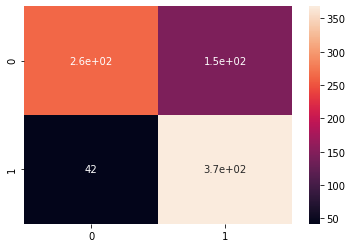

In [85]:
print('Accuracy Score=',accuracy_score(Y,y_pred))
print('Classification Report\n',classification_report(Y,y_pred))
print('ROC_AUC Score=',roc_auc_score(Y,y_pred))
print('Confusion Matrix\n',sns.heatmap(confusion_matrix(Y,y_pred), annot = True))

**Using Test Set to predict the Loan_Status**

In [77]:
#Loading the trained set

In [86]:
test = pd.read_csv('testset.csv')
testing= test.drop(['Loan_ID'], axis =1)
testing.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [87]:
testing.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
#Making all the changes which we had made to our trained set

In [88]:
testing['Loan_Amount_Term'] = testing['Loan_Amount_Term'].fillna(testing['Loan_Amount_Term'].mode()[0])
testing['Gender'] = testing['Gender'].fillna(testing['Gender'].mode()[0])
testing['Dependents'] = testing['Dependents'].fillna(testing['Dependents'].mode()[0])
testing['Self_Employed'] = testing['Self_Employed'].fillna(testing['Self_Employed'].mode()[0])

In [89]:
testing = pd.get_dummies(testing, columns=['Gender','Married','Education','Property_Area', 'Self_Employed'], drop_first = True)
testing.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,1,0
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,1,0
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0


In [90]:
testing['Dependents'] = testing['Dependents'].str.rstrip('+')
testing.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,1,0
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,1,0
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0
3,2,2340,2546,100.0,360.0,NaN,1,1,0,0,1,0


In [91]:
testing = pd.DataFrame(imputer.fit_transform(testing),columns = testing.columns)
testing.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0.0,5720.0,0.0,110.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,3076.0,1500.0,126.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,2.0,5000.0,1800.0,208.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,2.0,2340.0,2546.0,100.0,360.0,0.6,1.0,1.0,0.0,0.0,1.0,0.0


In [92]:
testing.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Self_Employed_Yes          0
dtype: int64

In [93]:
testing.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0.0,5720.0,0.0,110.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,3076.0,1500.0,126.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,2.0,5000.0,1800.0,208.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,2.0,2340.0,2546.0,100.0,360.0,0.6,1.0,1.0,0.0,0.0,1.0,0.0


In [94]:
test_scaled = scaler.fit_transform(testing)
test_scaled

array([[-0.75822199,  0.1864605 , -0.67333511, ..., -0.67981718,
         1.27335328, -0.33484506],
       [ 0.18187082, -0.35269225, -0.02984821, ..., -0.67981718,
         1.27335328, -0.33484506],
       [ 1.12196363,  0.0396413 ,  0.09884917, ..., -0.67981718,
         1.27335328, -0.33484506],
       ...,
       [-0.75822199, -0.31721094,  0.18164449, ...,  1.47098372,
        -0.78532801, -0.33484506],
       [-0.75822199,  0.0396413 ,  0.353241  , ..., -0.67981718,
        -0.78532801, -0.33484506],
       [-0.75822199,  0.89608667, -0.67333511, ..., -0.67981718,
        -0.78532801,  2.98645591]])

In [95]:
Loan_Status = lr.predict(test_scaled)
Loan_Status

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1.

In [96]:
pr = pd.DataFrame(Loan_Status)
pr.index = test.Loan_ID
pr.columns =["Loan_Status"]

In [97]:
pr['Loan_Status'].replace({0:'N',1:'Y'},inplace=True)

In [98]:
pr.to_csv("Predicted_Results.csv")

**Model Saving**

In [101]:
import joblib
filename = 'Loan Eligibility Prediction.sav'
joblib.dump(lr, filename)

['Loan Eligibility Prediction.sav']